In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data.head(891)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data['Sex'] = data['Sex'].replace({'female':1, 'male':0})

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data = data.drop('Name', axis = 1)
data = data.drop('Ticket', axis = 1)
data = data.drop('Cabin', axis = 1)

In [11]:
data.shape

(891, 9)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [13]:
data = data.drop('Embarked', axis = 1)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [15]:
data.shape

(891, 8)

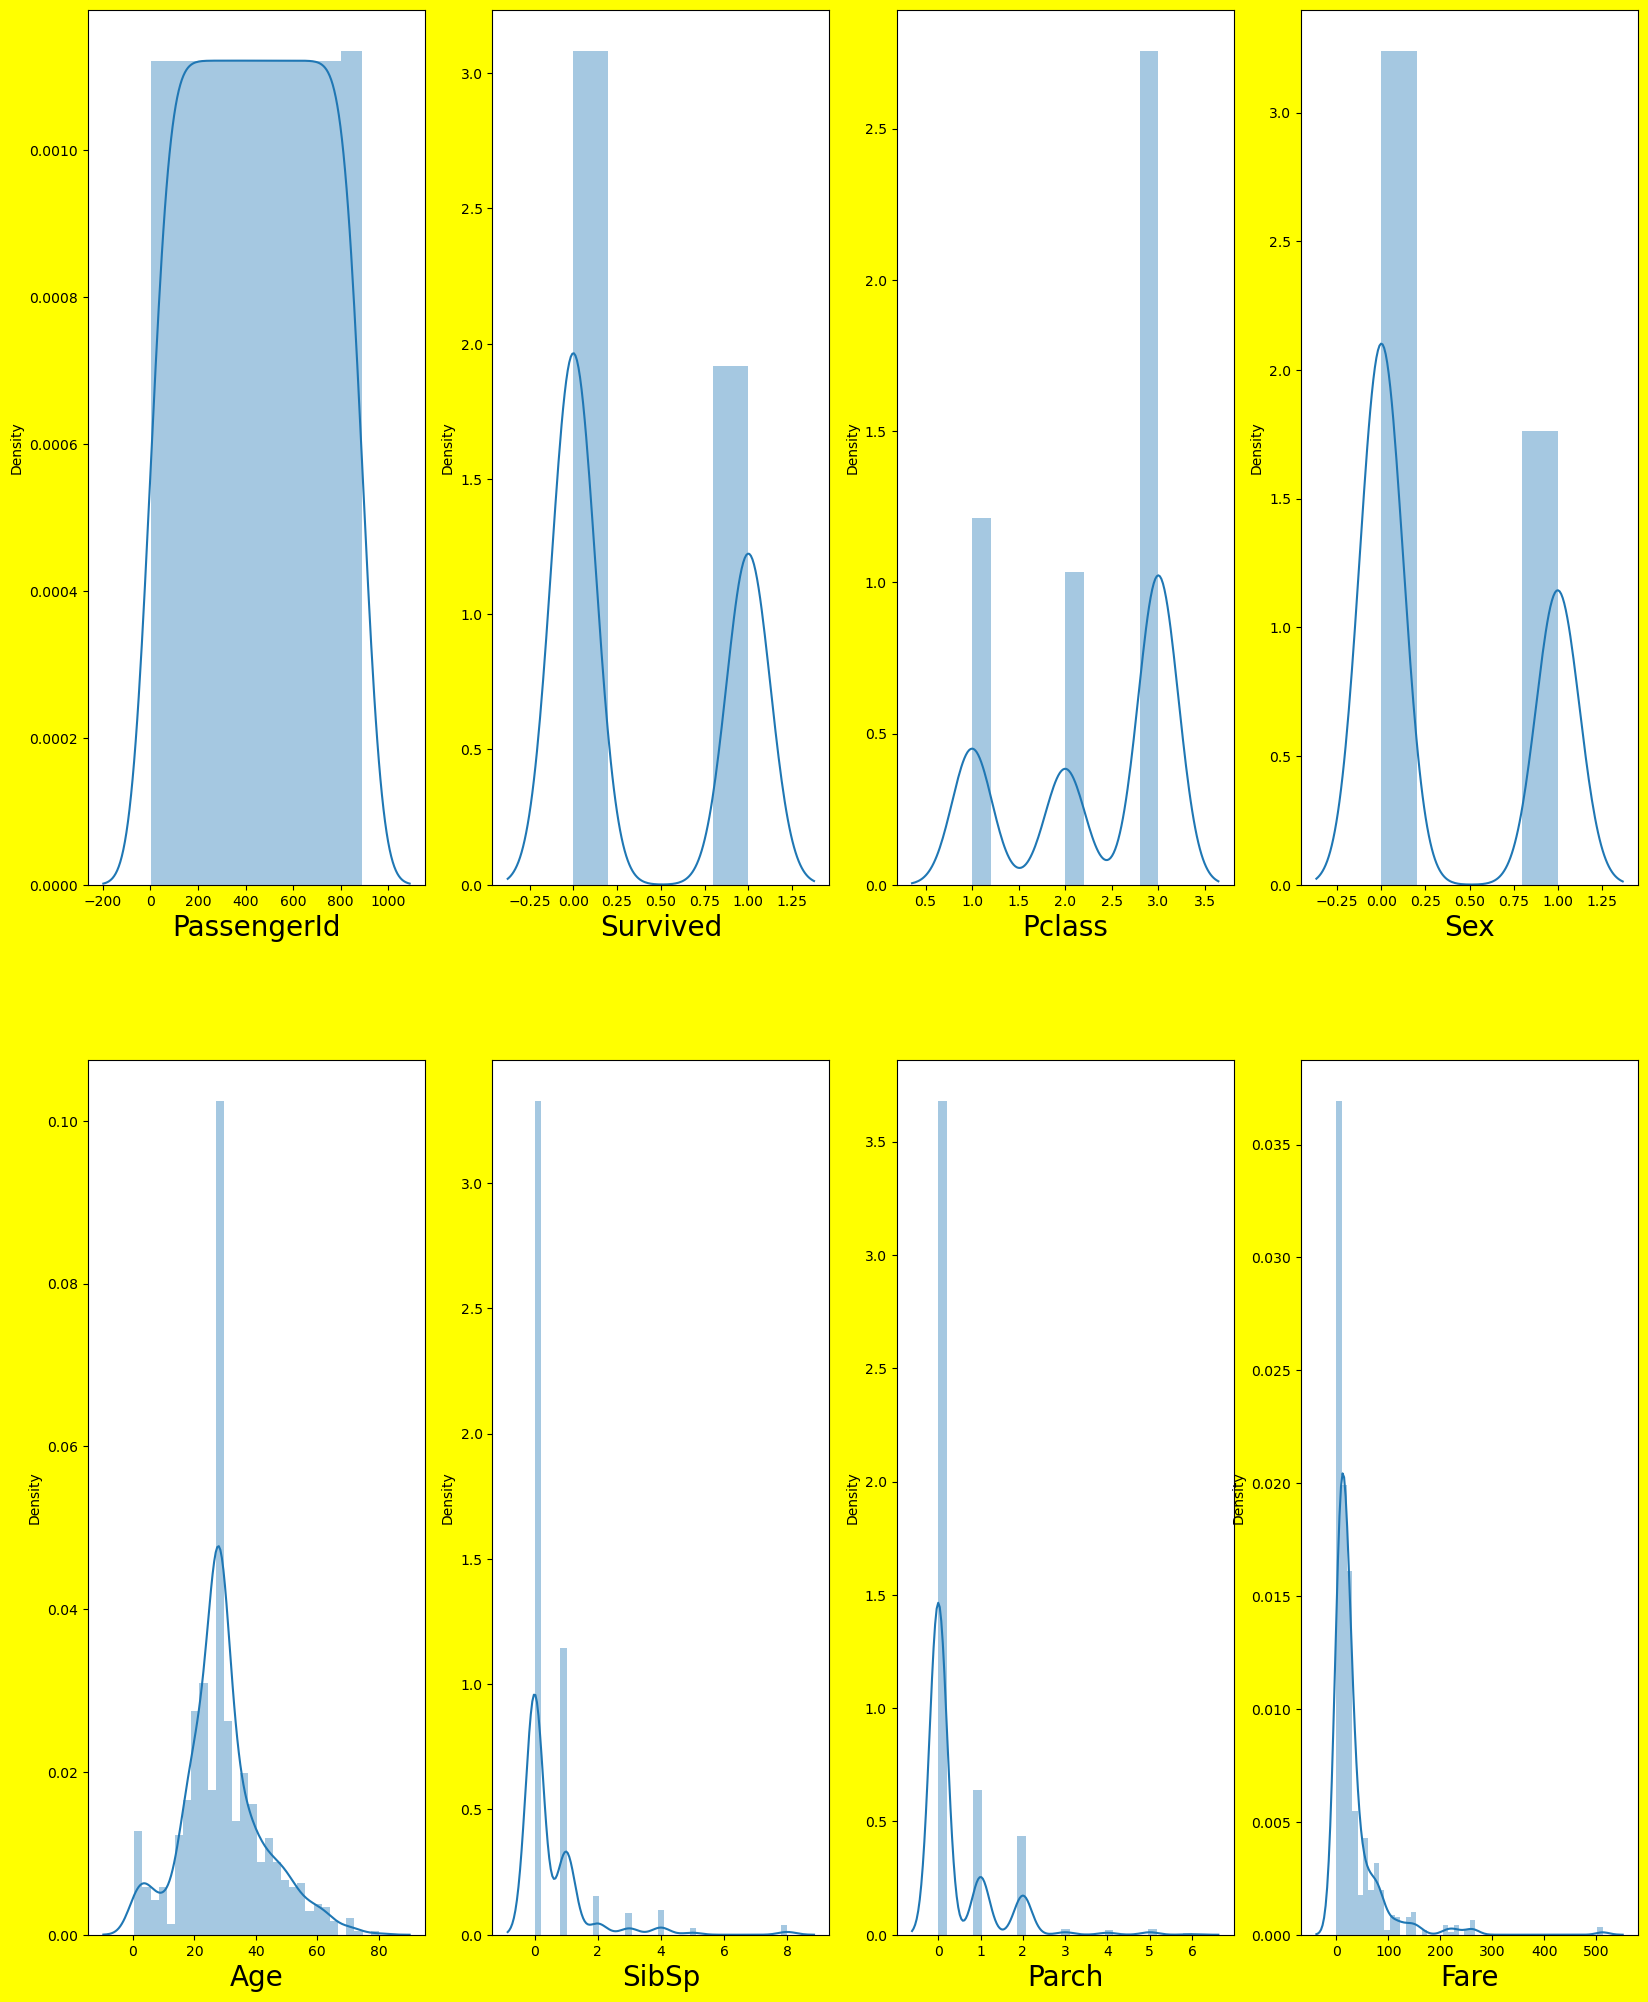

In [16]:
plt.figure(figsize=(20,25),facecolor= 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

In [17]:
data_feature = data.drop('Survived', axis = 1)

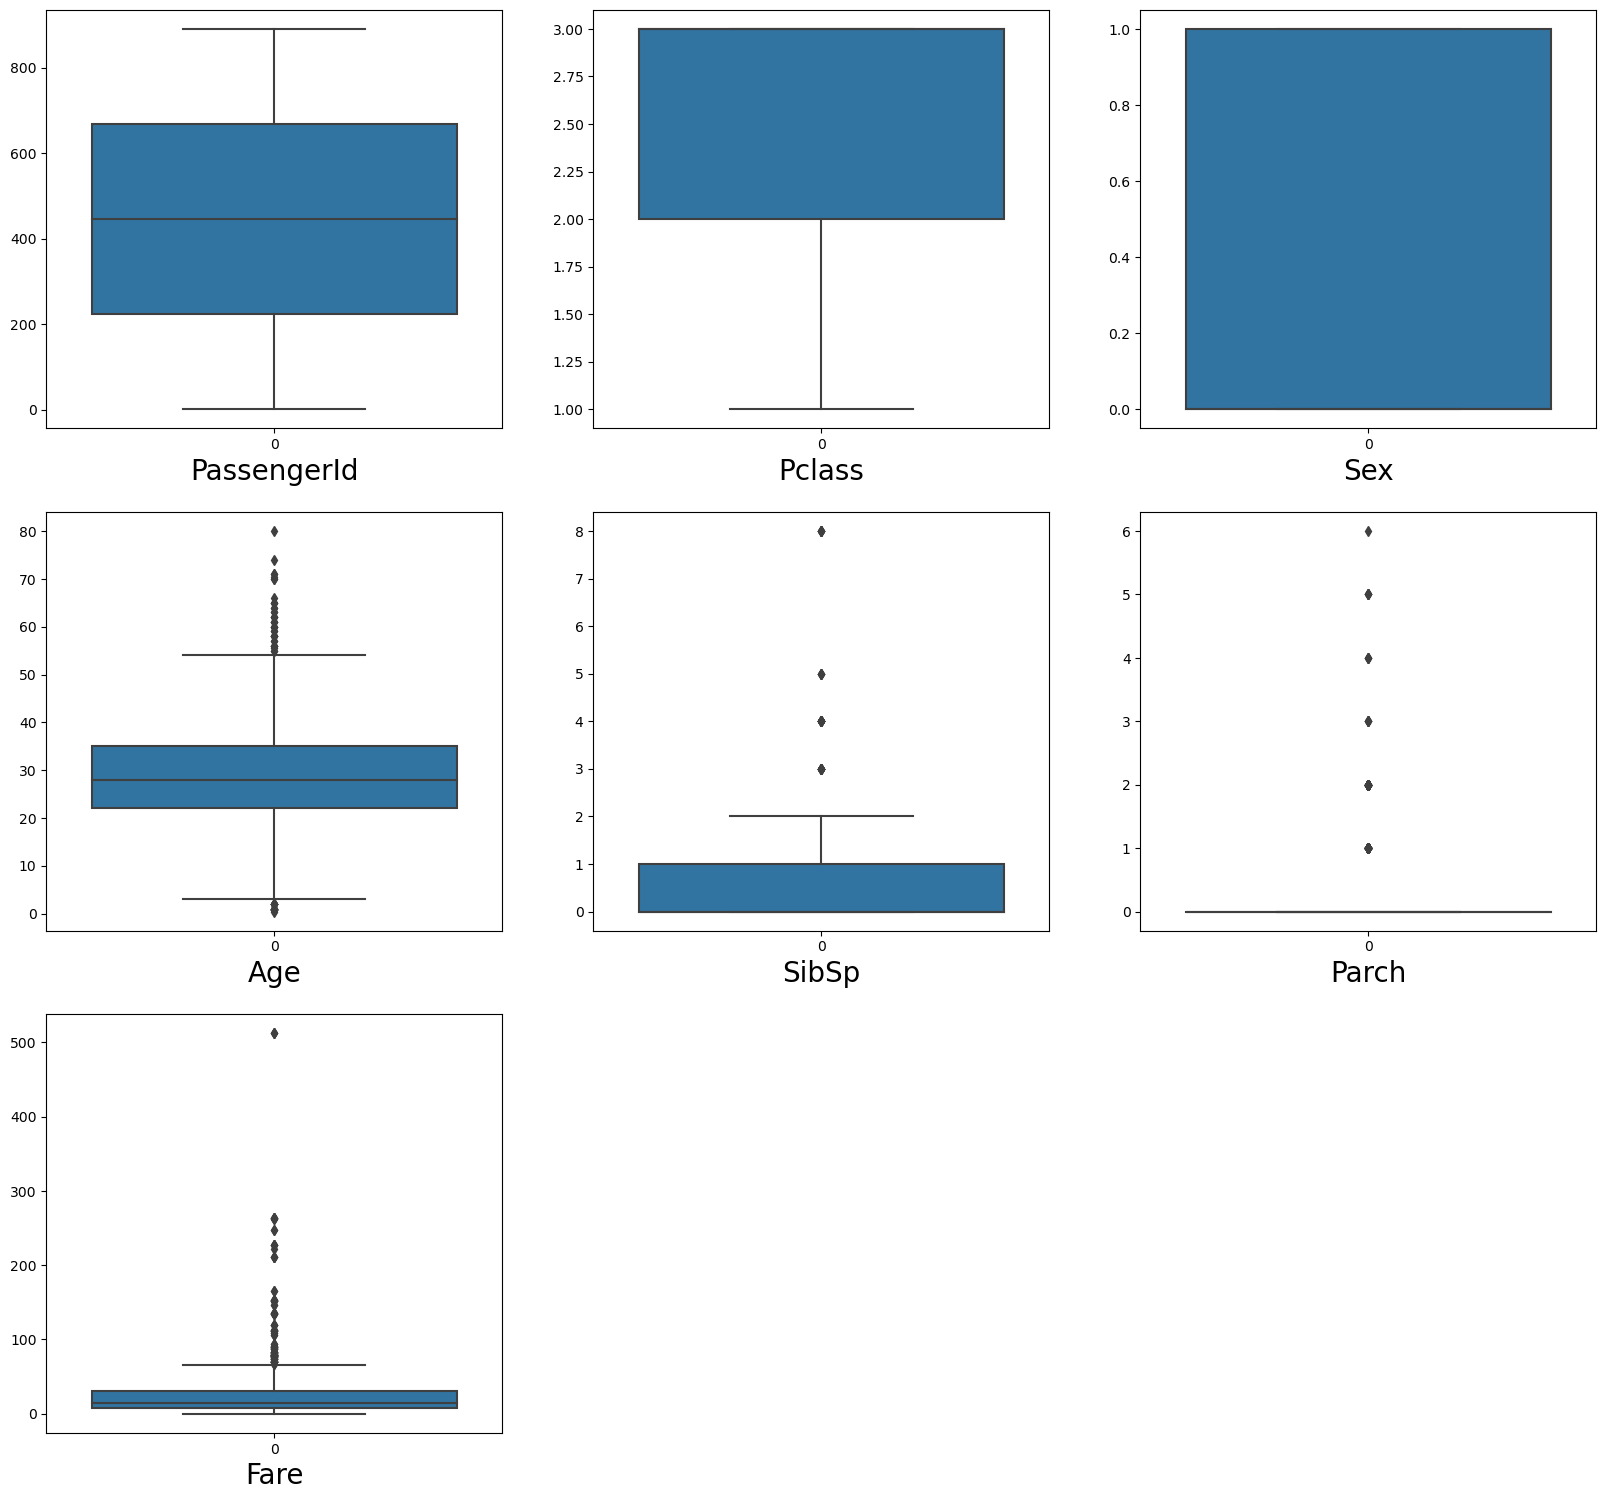

In [18]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data_feature:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(data_feature[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

In [19]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [20]:
upper_array = np.where(data['Age']> upper)[0]
upper_array

array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
       268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
       555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
       829, 851, 879])

In [21]:
data = data.drop(data.index[upper_array])
data.shape

(849, 8)

In [22]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,0,22.0,1,0,7.2500
1,1,2,1,1,1,38.0,1,0,71.2833
2,2,3,1,3,1,26.0,0,0,7.9250
3,3,4,1,1,1,35.0,1,0,53.1000
4,4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
844,886,887,0,2,0,27.0,0,0,13.0000
845,887,888,1,1,1,19.0,0,0,30.0000
846,888,889,0,3,1,28.0,1,2,23.4500
847,889,890,1,1,0,26.0,0,0,30.0000


In [23]:
lower_array = np.where(data['Age']< lower)
lower_array

(array([  7,  14,  74, 112, 156, 163, 173, 194, 281, 289, 323, 363, 368,
        448, 458, 505, 610, 612, 717, 749, 764, 785, 788, 791]),)

In [24]:
data = data.drop(data.index[lower_array])
data.shape

(825, 8)

In [27]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,0,22.0,1,0,7.2500
1,1,2,1,1,1,38.0,1,0,71.2833
2,2,3,1,3,1,26.0,0,0,7.9250
3,3,4,1,1,1,35.0,1,0,53.1000
4,4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
820,886,887,0,2,0,27.0,0,0,13.0000
821,887,888,1,1,1,19.0,0,0,30.0000
822,888,889,0,3,1,28.0,1,2,23.4500
823,889,890,1,1,0,26.0,0,0,30.0000


In [28]:
Q1 = data['SibSp'].quantile(0.25)
Q3 = data['SibSp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [29]:
upper_array = np.where(data['SibSp']> upper)[0]
upper_array

array([ 20,  23,  45,  53,  57,  62,  65,  78,  81, 147, 157, 160, 164,
       166, 183, 210, 213, 240, 245, 255, 298, 313, 345, 378, 444, 448,
       500, 501, 586, 630, 632, 671, 729, 733, 753, 759, 782, 786, 798])

In [30]:
data = data.drop(data.index[upper_array])
data.shape

(786, 8)

In [31]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,0,22.0,1,0,7.2500
1,1,2,1,1,1,38.0,1,0,71.2833
2,2,3,1,3,1,26.0,0,0,7.9250
3,3,4,1,1,1,35.0,1,0,53.1000
4,4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
781,886,887,0,2,0,27.0,0,0,13.0000
782,887,888,1,1,1,19.0,0,0,30.0000
783,888,889,0,3,1,28.0,1,2,23.4500
784,889,890,1,1,0,26.0,0,0,30.0000


In [32]:
Q1 = data['Parch'].quantile(0.25)
Q3 = data['Parch'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [33]:
upper_array = np.where(data['Parch']> upper)[0]
upper_array

array([  7,   9,  11,  20,  36,  49,  54,  71,  77,  79,  80,  84,  99,
       104, 108, 116, 120, 125, 127, 128, 132, 134, 138, 142, 143, 144,
       148, 153, 157, 162, 165, 200, 210, 211, 214, 216, 217, 221, 223,
       231, 232, 236, 254, 265, 266, 268, 272, 273, 277, 280, 281, 284,
       298, 302, 306, 310, 312, 325, 336, 340, 353, 361, 362, 364, 368,
       369, 380, 381, 382, 384, 389, 390, 392, 394, 413, 425, 432, 440,
       457, 463, 465, 466, 468, 472, 473, 478, 479, 480, 487, 496, 508,
       509, 513, 520, 522, 527, 535, 537, 542, 543, 545, 549, 560, 561,
       571, 577, 589, 596, 597, 601, 604, 606, 612, 616, 623, 634, 649,
       655, 658, 662, 663, 666, 674, 684, 689, 693, 706, 708, 709, 722,
       724, 727, 735, 747, 749, 750, 752, 753, 755, 765, 767, 775, 780,
       783])

In [34]:
data = data.drop(data.index[upper_array])
data.shape

(642, 8)

In [35]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,0,22.0,1,0,7.2500
1,1,2,1,1,1,38.0,1,0,71.2833
2,2,3,1,3,1,26.0,0,0,7.9250
3,3,4,1,1,1,35.0,1,0,53.1000
4,4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
637,884,885,0,3,0,25.0,0,0,7.0500
638,886,887,0,2,0,27.0,0,0,13.0000
639,887,888,1,1,1,19.0,0,0,30.0000
640,889,890,1,1,0,26.0,0,0,30.0000


In [36]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [37]:
upper_array = np.where(data['Fare']> upper)[0]
upper_array

array([  1,  21,  23,  39,  45,  46,  52,  54,  68,  87, 103, 111, 120,
       150, 153, 159, 164, 176, 181, 182, 183, 189, 204, 205, 217, 218,
       220, 221, 229, 234, 236, 237, 261, 262, 265, 266, 270, 274, 280,
       296, 313, 323, 347, 348, 354, 361, 362, 365, 369, 376, 382, 387,
       390, 398, 415, 425, 431, 439, 450, 460, 461, 462, 470, 473, 478,
       490, 494, 495, 501, 508, 515, 527, 533, 537, 548, 553, 566, 571,
       597, 605, 614])

In [38]:
data = data.drop(data.index[upper_array])
data.shape

(561, 8)

In [39]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,0,22.0,1,0,7.2500
1,2,3,1,3,1,26.0,0,0,7.9250
2,3,4,1,1,1,35.0,1,0,53.1000
3,4,5,0,3,0,35.0,0,0,8.0500
4,5,6,0,3,0,28.0,0,0,8.4583
...,...,...,...,...,...,...,...,...,...
556,884,885,0,3,0,25.0,0,0,7.0500
557,886,887,0,2,0,27.0,0,0,13.0000
558,887,888,1,1,1,19.0,0,0,30.0000
559,889,890,1,1,0,26.0,0,0,30.0000


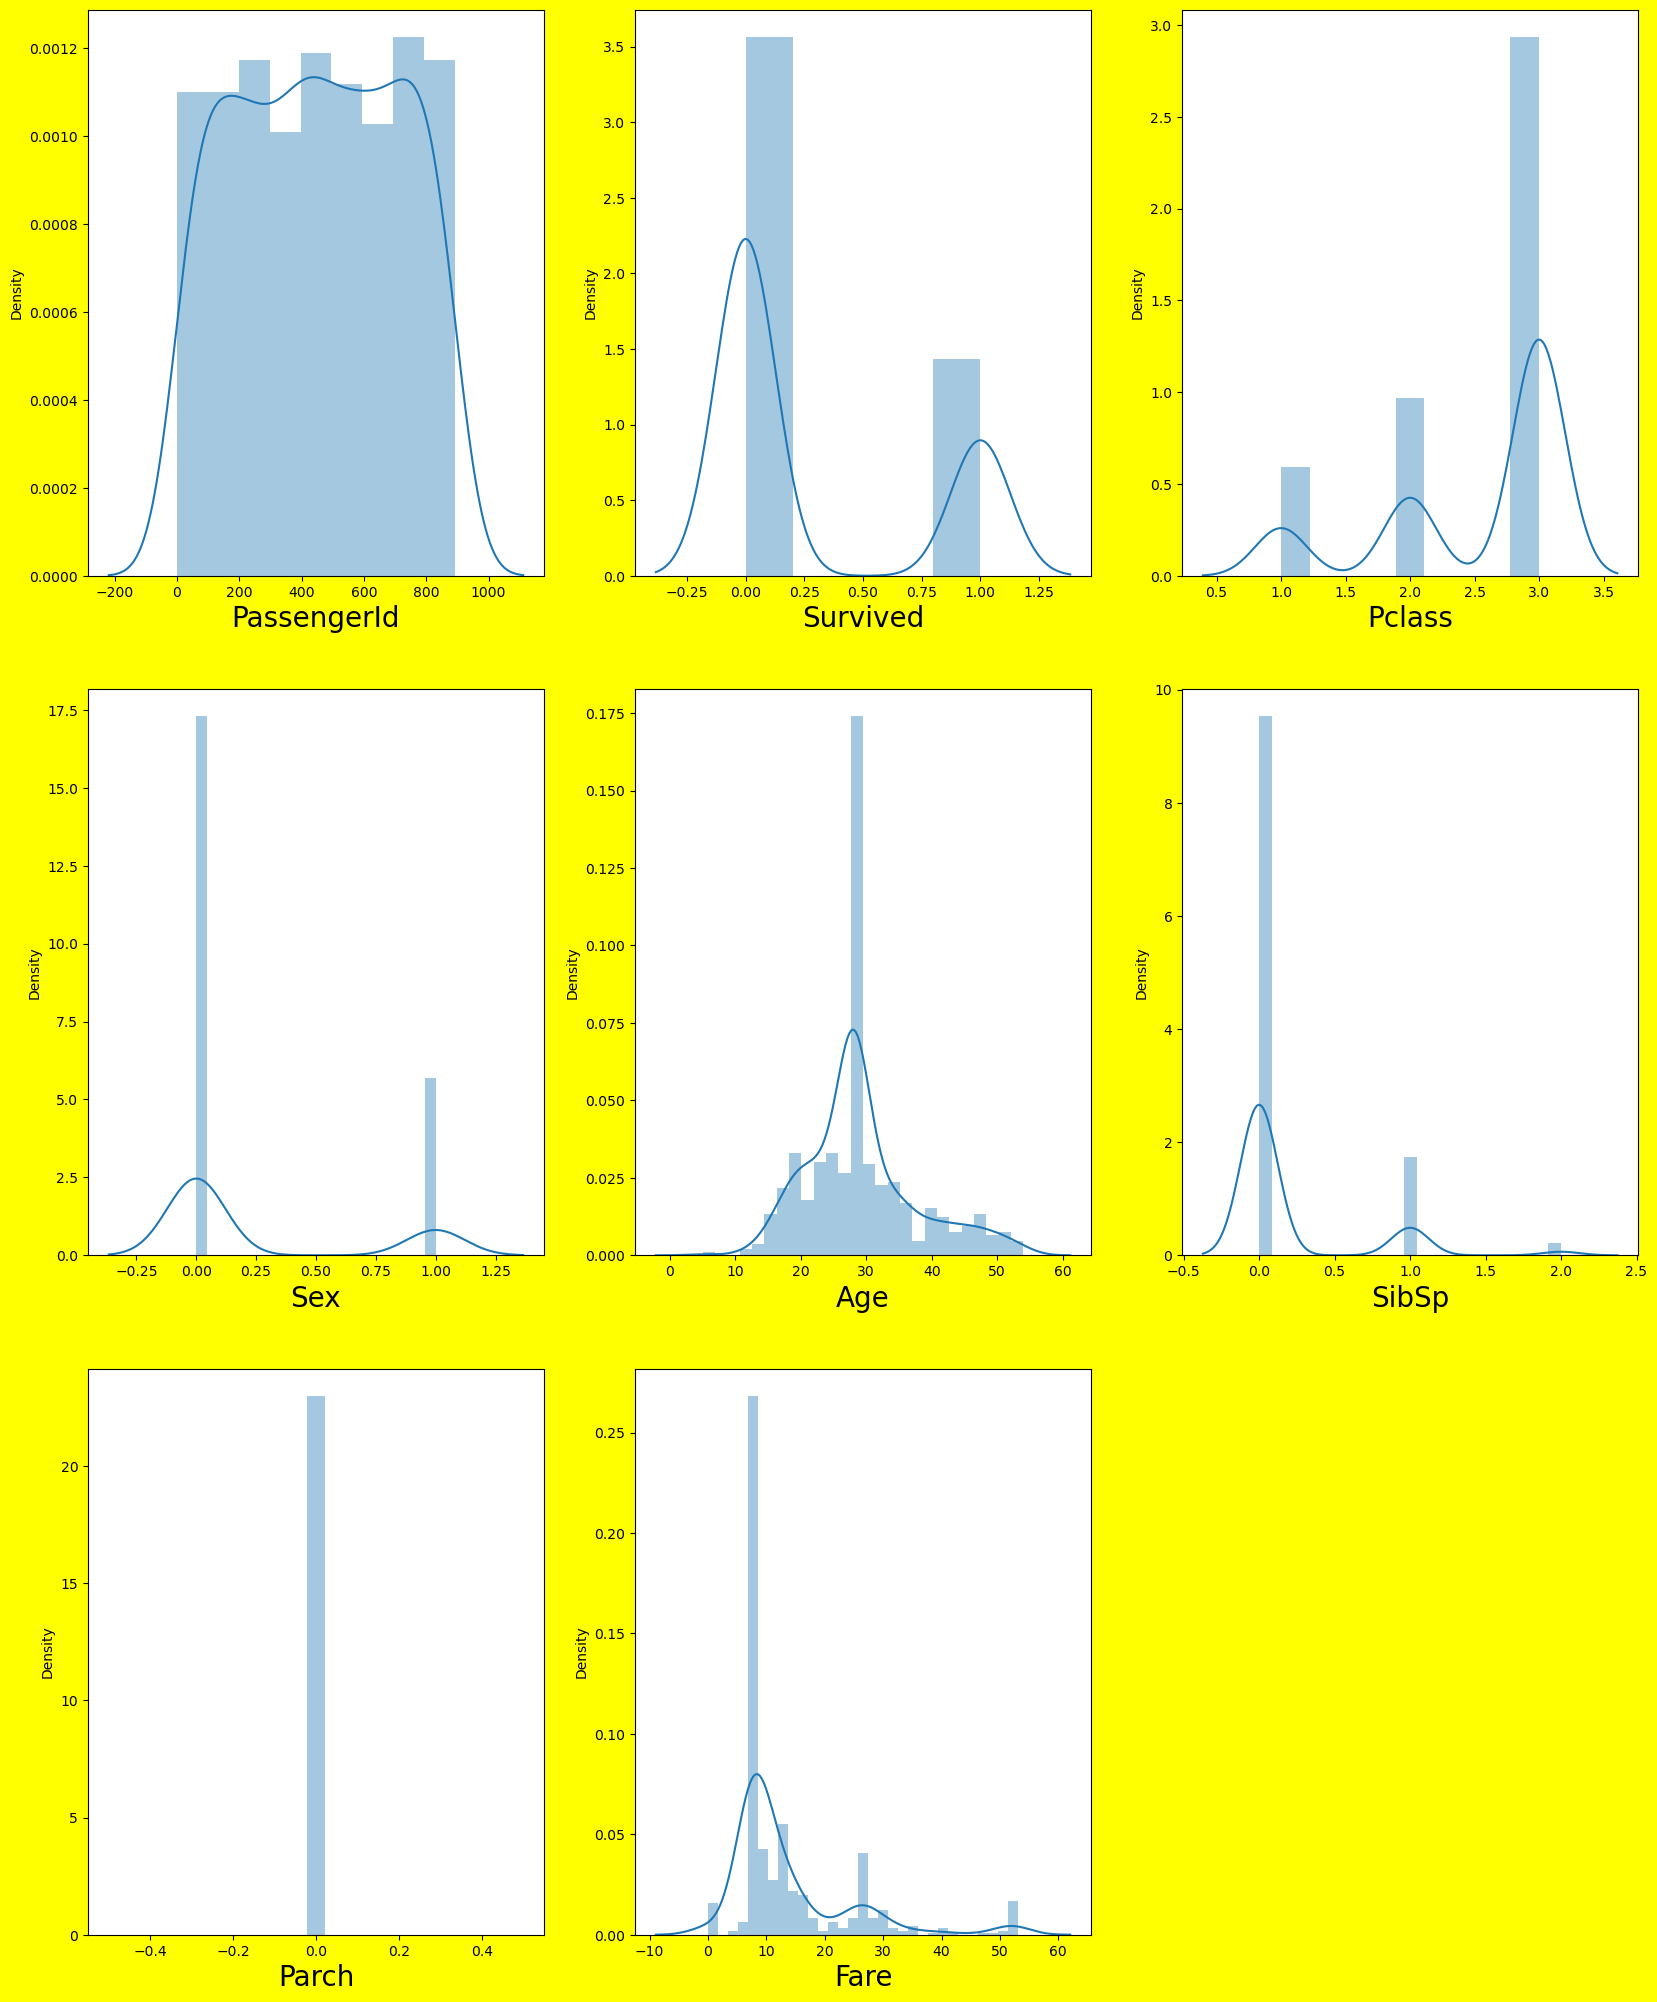

In [40]:
plt.figure(figsize=(20,25),facecolor= 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

In [41]:
X = data.drop(columns= ['Survived'])

y = data['Survived']

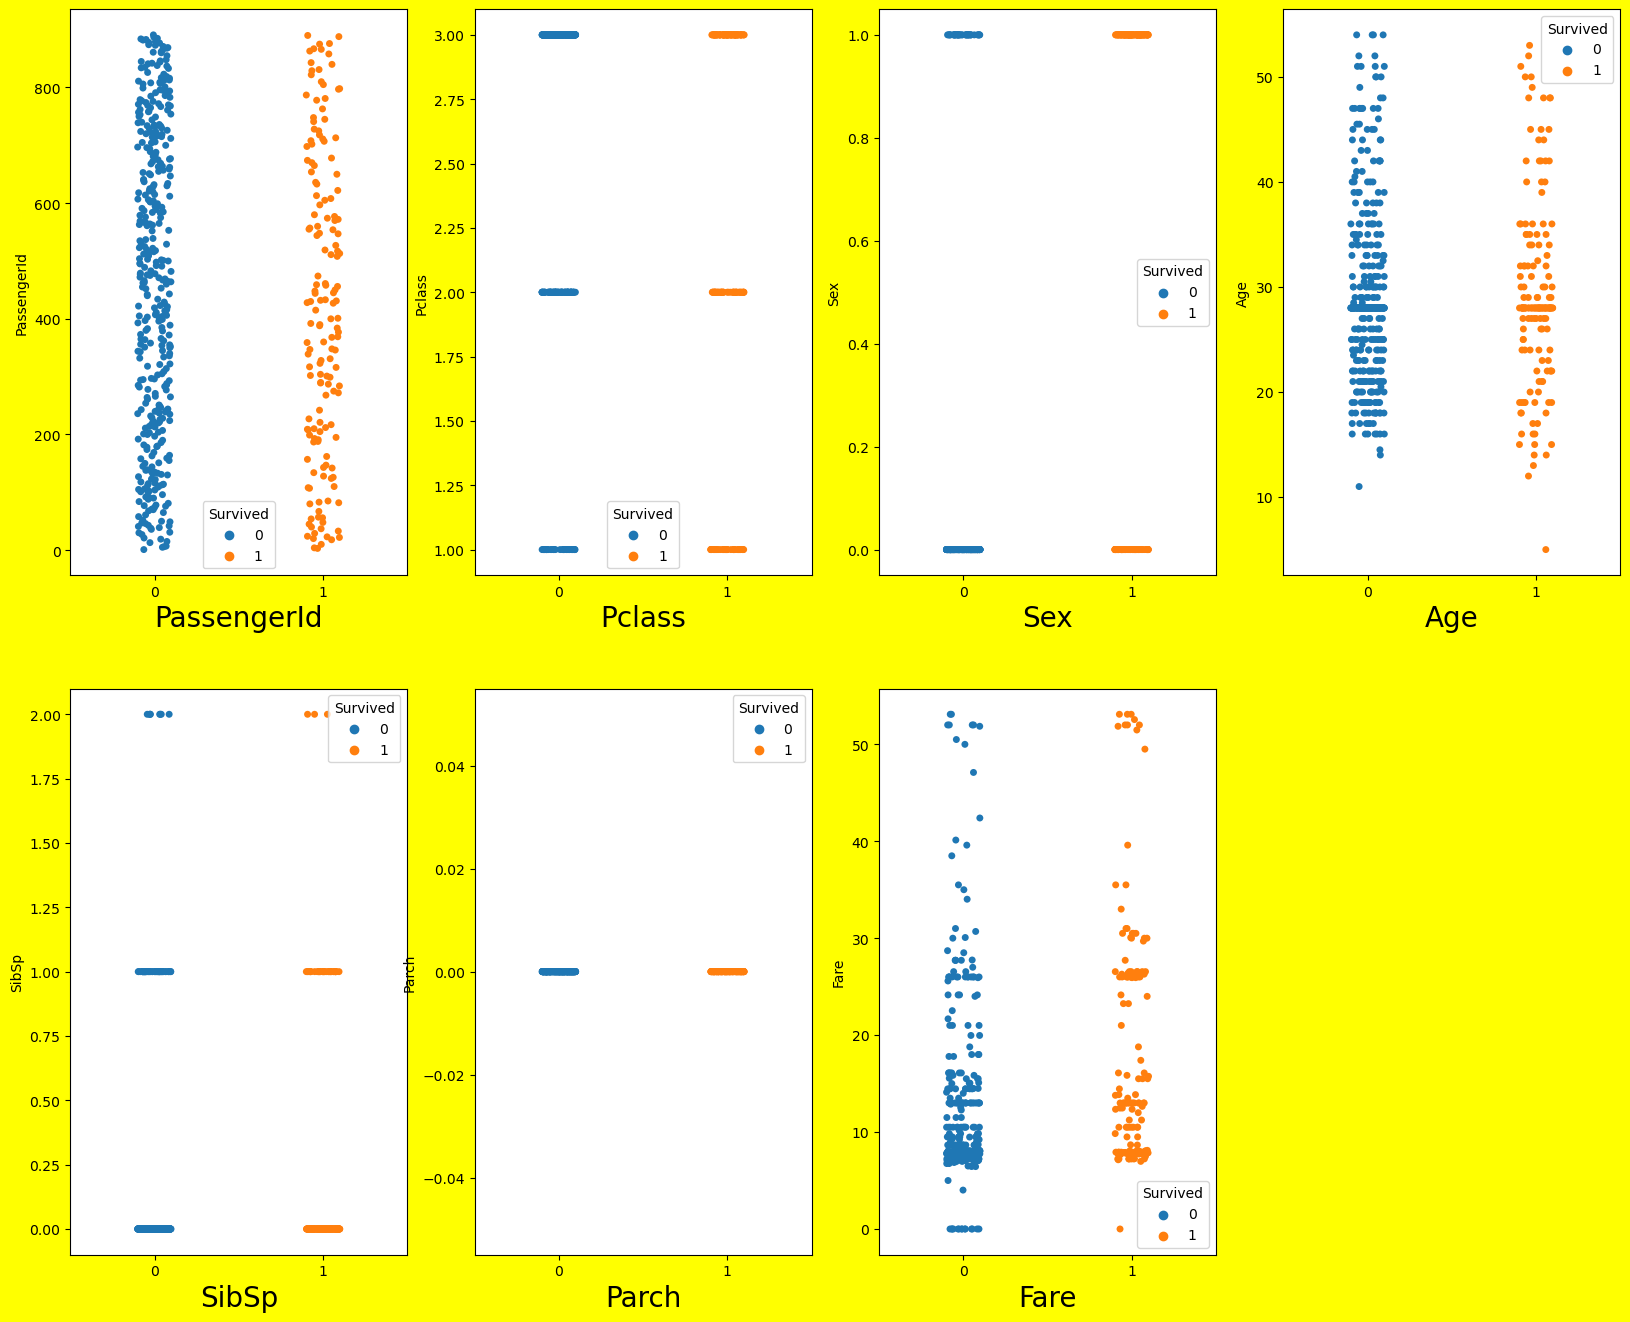

In [42]:
plt.figure(figsize=(20,25),facecolor= 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 9:
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(x=y, y=X[column],hue=y)
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.show()

In [43]:
scaler = StandardScaler()
X_sclaer = scaler.fit_transform(X)

In [44]:
X_sclaer

array([[-1.72499128,  0.66921221, -0.57391976, ...,  1.83939883,
         0.        , -0.61395677],
       [-1.7172895 ,  0.66921221,  1.74240386, ..., -0.4335147 ,
         0.        , -0.54998239],
       [-1.71343862, -2.12207439,  1.74240386, ...,  1.83939883,
         0.        ,  3.73156283],
       ...,
       [ 1.69074516, -2.12207439,  1.74240386, ..., -0.4335147 ,
         0.        ,  1.54221707],
       [ 1.69844693, -2.12207439, -0.57391976, ..., -0.4335147 ,
         0.        ,  1.54221707],
       [ 1.70229782,  0.66921221, -0.57391976, ..., -0.4335147 ,
         0.        , -0.56656834]])

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X_sclaer,y, test_size = 0.25, random_state= 348)

In [46]:
y_train.head()

572    1
474    0
744    1
364    0
810    0
Name: Survived, dtype: int64

In [47]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred = log_reg.predict(x_test)

In [49]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1])

In [50]:
log_reg.predict_proba(x_test)

array([[0.37196136, 0.62803864],
       [0.91102951, 0.08897049],
       [0.36479839, 0.63520161],
       [0.90954069, 0.09045931],
       [0.91182562, 0.08817438],
       [0.91162192, 0.08837808],
       [0.8203321 , 0.1796679 ],
       [0.81467047, 0.18532953],
       [0.39212874, 0.60787126],
       [0.9098835 , 0.0901165 ],
       [0.91096849, 0.08903151],
       [0.19430484, 0.80569516],
       [0.92250486, 0.07749514],
       [0.91122822, 0.08877178],
       [0.82999217, 0.17000783],
       [0.91578765, 0.08421235],
       [0.40208471, 0.59791529],
       [0.36184327, 0.63815673],
       [0.81002433, 0.18997567],
       [0.91810941, 0.08189059],
       [0.91524009, 0.08475991],
       [0.80563463, 0.19436537],
       [0.35493863, 0.64506137],
       [0.82038182, 0.17961818],
       [0.82003637, 0.17996363],
       [0.90672798, 0.09327202],
       [0.35914403, 0.64085597],
       [0.9091348 , 0.0908652 ],
       [0.90643547, 0.09356453],
       [0.36195771, 0.63804229],
       [0.

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy = accuracy_score(y_test,y_pred)

accuracy

0.8226950354609929

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        98
           1       0.70      0.72      0.71        43

    accuracy                           0.82       141
   macro avg       0.79      0.79      0.79       141
weighted avg       0.82      0.82      0.82       141

